$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge convert$ $\hspace{0.1cm}$ $\Huge maps$ $\hspace{0.1cm}$ $\Huge units$ $\Huge :$ 

# Modules : 

In [1]:
%matplotlib inline
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
from astropy import constants as cst
from astropy.cosmology import FlatLambdaCDM
import pysm as pysm
import ccatp_sky_model as sky

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.7255)
T_CMB = cosmo.Tcmb0.si.value
k_B = cst.k_B.value
h = cst.h.value
c = cst.c.value

In [3]:
data_path = "/vol/arc3/data1/sz/CCATp_sky_model/templates/"

# Function : 

In [4]:
def convert_units(freq, values, cmb2mjy = False, mjy2cmb = False, rj2mjy = False, mjy2rj = False, cmb2rj = False, rj2cmb = False):

    '''Convert observed signal at given frequencies to different units. 

    Parameters
    ----------
    freq: float or float array
        Frequency in Hz.
    values: float or float array
        Measured signal.
    cmb2mjy: bool, optional
        If True, the input is assumed to be K_CMB, the output will be MJy/sr.
        Default: False
    mjy2cmb: bool, optional
        If True, the input is assumed to be MJy/sr, the output will be K_CMB.
        Default: False
    rj2mjy: bool, optional
        If True, the input is assumed to be K_RJ, the output will be MJy/sr.
        Default: False
    mjy2rj: bool, optional
        If True, the input is assumed to be MJy/sr, the output will be K_RJ.
        Default: False
    cmb2rj: bool, optional
        If True, the input is assumed to be K_CMB, the output will be K_RJ.
        Default: False
    rj2cmb: bool, optional
        If True, the input is assumed to be K_RJ, the output will be K_CMB.
        Default: False

    Returns
    -------
    converted_signal: float or float array
        Converted signal
    '''

    x = h * freq / k_B / T_CMB
    
    if cmb2mjy is True:
        conversion = 1e20 * 2*k_B**3.*T_CMB**2. / (h * c)**2. * x**4. * np.exp(x) / (np.exp(x)-1)**2.
    elif mjy2cmb is True:
        conversion = 1/(1e20 * 2*k_B**3.*T_CMB**2. / (h * c)**2. * x**4. * np.exp(x) / (np.exp(x)-1)**2.)
    elif rj2mjy is True:
        conversion = 1e20 * 2*freq**2.*k_B/c**2.
    elif mjy2rj is True:
        conversion = 1/(1e20 * 2*freq**2.*k_B/c**2.)
    elif cmb2rj is True:
        conversion = (k_B*T_CMB/h)**2. * x**4. * np.exp(x) / (np.exp(x)-1)**2. / freq**2.
    elif rj2cmb is True:
        conversion = 1/((k_B*T_CMB/h)**2. * x**4. * np.exp(x) / (np.exp(x)-1)**2. / freq**2.)        
    else:
        print('Not sure which units are given and what should be returned.')

    converted_signal = conversion * values

    return(converted_signal)

# Launch : 

## Initial map : 

In [7]:
CMB_path = 'CMB/CMB_unlensed_CITA_mK.fits'

In [8]:
CMB = hp.read_map(data_path + CMB_path, dtype = np.float32)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


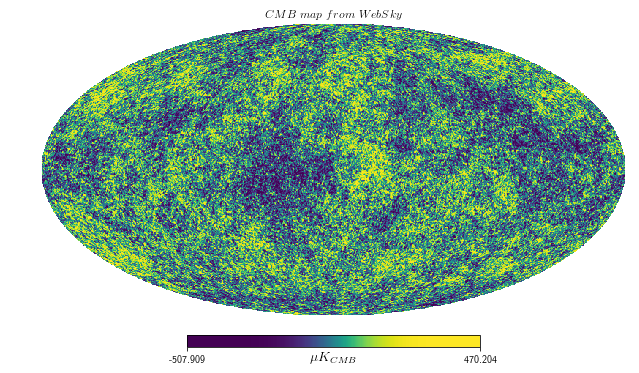

In [10]:
hp.mollview(CMB, title="$CMB$ $map$ $from$ $WebSky$", norm='hist',unit='$\mu K_{CMB}$')

## Converted map : 

In [13]:
CMB_MJy = convert_units(freq=150e9, values=CMB*1e-6, cmb2mjy = True, mjy2cmb = False, rj2mjy = False,
                        mjy2rj = False, cmb2rj = False,rj2cmb = False)

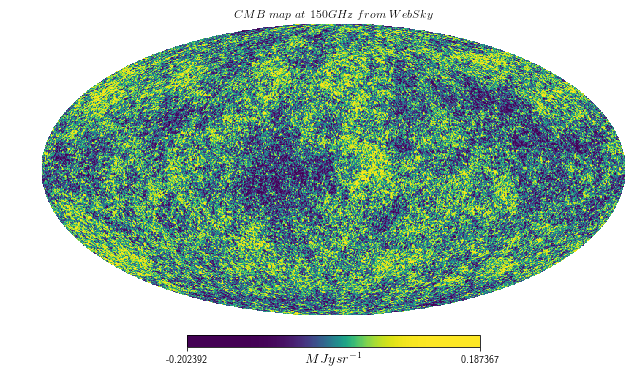

In [15]:
hp.mollview(CMB_MJy, title="$CMB$ $map$ $at$ $150GHz$ $from$ $WebSky$", norm='hist',unit='$MJysr^{-1}$')